In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def normalizedCrossCorrelation(p,q):
    p,q = p[0], q[0]
    sum, z1, z2 = 0, 0, 0
    for i in range(len(p)):
        sum += p[i] * q[i]
        z1 += p[i] * p[i]
        z2 += q[i] * q[i]
    return sum / math.sqrt(z1*z2)

(220, 220)
before padding : 44 44
after padding : 52 52
max_correlation (user-defined) : 0.5194785902019393
max_correlation (built-in) : [[0.51947859]]


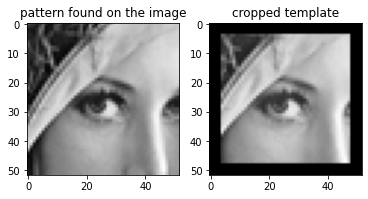

In [ ]:
imgRef = mpimg.imread('lena.png')
imgRef = rgb2gray(imgRef)

img = mpimg.imread('lenaLeft.png')
img = rgb2gray(img)

dim = img.shape

print(imgRef.shape)
print("before padding :", len(img), len(img[0]))
img = np.array(img)

p, q = int(1.2*len(img)), int(1.2*len(img[0]))
print("after padding :", p,q)
padded = np.zeros((p,q))
ind = int(0.1*len(img))
padded[ind:ind + img.shape[0], ind:ind + img.shape[1]] = img
img = padded

imgVector = [img[i,j] for j in range(len(img[0])) for i in range(len(img))]
# print(imgVector)

maxi, maxi1 = -1, -1
ans = []
for x in range(0, len(imgRef) - len(img), 2):
    for y in range(0, len(imgRef[0]) - len(img[0]), 2):
        # print("Reached check 2, bug after this")
        temp = imgRef[x:x+len(img), y:y+len(img[0])]
        tempVector = [temp[i,j] for j in range(len(temp[0])) for i in range(len(temp))]
        a = np.array(imgVector).reshape(1,len(imgVector))
        a = a - np.mean(a)
        b = np.array(tempVector).reshape(1,len(tempVector))
        b = b - np.mean(b)
        temp1,temp2 = a, b
        mod1 = np.linalg.norm(a)
        mod2 = np.linalg.norm(b)
        a /= mod1
        b /= mod2
        out = normalizedCrossCorrelation(a,b) #user-defined
        out1 = cosine_similarity(X=temp1, Y=temp2, dense_output=True) #built-in function
        maxi1 = out1 if out1 > maxi1 else maxi1
        if out > maxi:
            maxi = out
            ans =[]
            ans.append(temp)
            ans.append(img)
            X,Y = x,y


print("max_correlation (user-defined) :", maxi)
print("max_correlation (built-in) :", maxi1)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(ans[0],cmap="gray")
a.set_title("pattern found on the image")

a = fig.add_subplot(1,2,2)
plt.imshow(ans[1],cmap="gray")
a.set_title("cropped template")
plt.show()


imgRef = cv2.rectangle(imgRef, (Y, X), (Y + q, X + p), (255, 0, 0), 4)
cv2.imshow("marked Image", imgRef)
cv2.waitKey(0)
cv2.destroyAllWindows()